In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model
using R or Python.

In [4]:
Salary = pd.read_csv("Salary_Data.csv")

In [6]:
Delivery = pd.read_csv("delivery_time.csv")

In [7]:
Delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
import matplotlib.pyplot as plt

In [18]:
plt.boxplot(Delivery.DeliveryTime)
Delivery.describe()

AttributeError: 'DataFrame' object has no attribute 'DeliveryTime'

In [22]:
Delivery1 = Delivery.rename(columns ={"Delivery Time" : "DT" , "Sorting Time" : "ST"})

In [23]:
Delivery1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


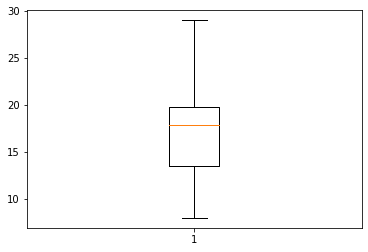

In [24]:
plt.boxplot(Delivery1.DT)
Delivery1.describe()

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

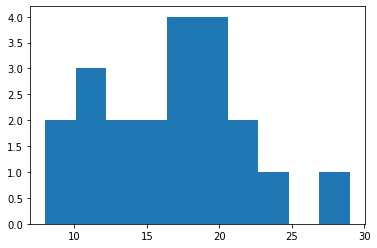

In [26]:
plt.hist(Delivery1.DT)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e68115850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e68115f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e681154c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e68123610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e68123970>],
 'means': []}

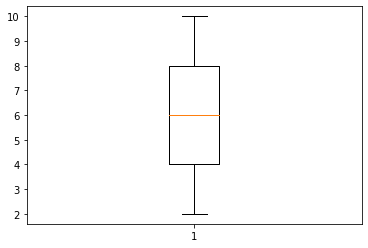

In [27]:
plt.boxplot(Delivery1.ST) 

In [28]:
Delivery1.ST.corr(Delivery1.DT)

0.8259972607955325

In [29]:
import statsmodels.formula.api as smf
model=smf.ols("ST~DT",data=Delivery1).fit()
model.params 

Intercept   -0.756673
DT           0.413744
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        21:49:31   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred = model.predict(Delivery1.iloc[:,0])
pred 

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [32]:
model.resid 
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [34]:
pred = model.predict(Delivery1.iloc[:,0])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(Delivery1['ST'])-np.array(pred))**2))
rmse_lin

1.398343056795723

In [35]:
model2 = smf.ols('ST~np.log(DT)',data=Delivery1).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        21:52:00   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
pred2 = model2.predict(pd.DataFrame(Delivery1['DT'])) 

In [39]:
pred2
rmse_log = np.sqrt(np.mean((np.array(Delivery1['ST'])-np.array(pred2))**2))
rmse_log

1.3337477286899517

In [40]:
pred2.corr(Delivery1.ST)

0.843177263722415

In [41]:
model3 = smf.ols('np.log(ST)~DT',data=Delivery1).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        21:53:33   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
DT             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred_log = model3.predict(pd.DataFrame(Delivery1['DT'])) 

In [45]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [46]:
rmse_exp = np.sqrt(np.mean((np.array(Delivery1['ST'])-np.array(pred3))**2))
rmse_exp 

1.79214500168698

In [47]:
pred3.corr(Delivery1.ST)

0.7472768828616797

In [48]:
student_resid = model3.resid_pearson 
student_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Actual')

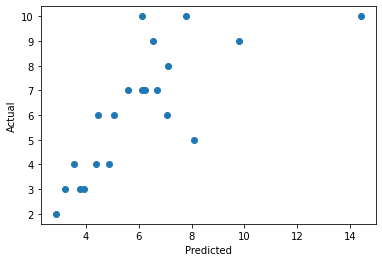

In [49]:
plt.scatter(x=pred3,y=Delivery1.ST)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [5]:
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
s1 = Salary.rename(columns ={"YearsExperience" : "years" , "Salary" : "sal"})

In [12]:
s1

,years,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
import matplotlib.pyplot as plt

,years,sal
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


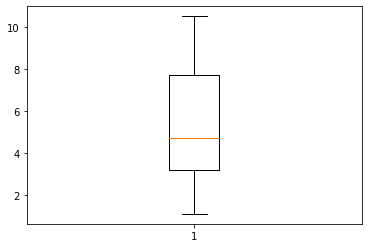

In [13]:
plt.boxplot(s1.years)
s1.describe()

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

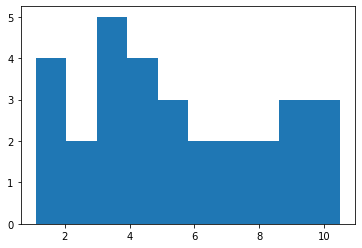

In [14]:
plt.hist(s1.years) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3282a93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3282a9ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3282a9070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3282b5160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3282b53d0>],
 'means': []}

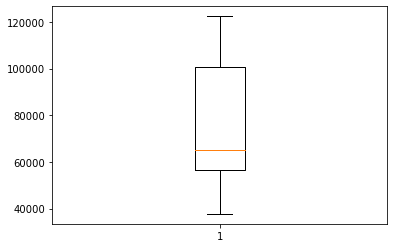

In [15]:
plt.boxplot(s1.sal) 

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

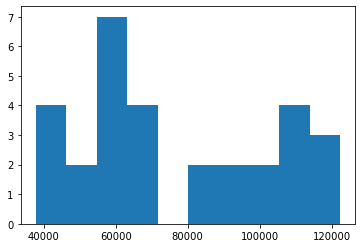

In [16]:
plt.hist(s1.sal) 

In [17]:
s1.sal.corr(s1.years)

0.9782416184887598

In [18]:
s1.years.corr(s1.sal)

0.9782416184887599

In [25]:
import statsmodels.formula.api as smf
model=smf.ols("sal~years",data=s1).fit()
model.params

Intercept    25792.200199
years         9449.962321
dtype: float64

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        20:09:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred = model.predict(s1.iloc[:,0])
pred  

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [28]:
model.resid 
model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [29]:
pred = model.predict(s1.iloc[:,0])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(s1['sal'])-np.array(pred))**2))
rmse_lin 


5592.043608760662

Text(0, 0.5, 'sal')

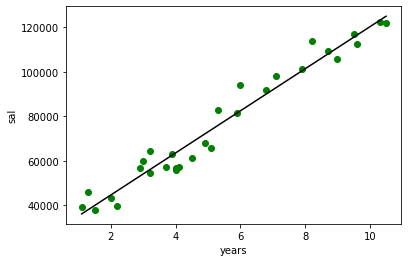

In [31]:
import matplotlib.pylab as plt
plt.scatter(x=s1['years'],y=s1['sal'],color='green')
plt.plot(s1['years'],pred,color='black')
plt.xlabel('years')
plt.ylabel('sal')

In [32]:
model2 = smf.ols('sal~np.log(years)',data=s1).fit()
model2.params
model2.resid 
model2.resid_pearson 
 

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           3.25e-13
Time:                        20:13:09   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(years)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred2 = model2.predict(pd.DataFrame(s1['years']))

In [35]:
pred2
rmse_log = np.sqrt(np.mean((np.array(s1['sal'])-np.array(pred2))**2))
rmse_log 

10302.893706228306

In [36]:
pred2.corr(s1.sal)

0.9240610817882641

Text(0, 0.5, 'Sal')

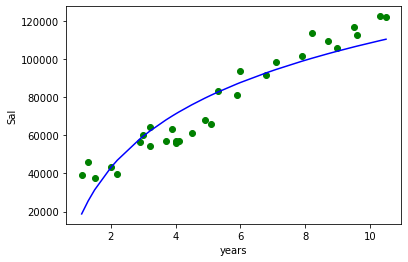

In [38]:
plt.scatter(x=s1['years'],y=s1['sal'],color='green')
plt.plot(s1['years'],pred2,color='blue')
plt.xlabel('years')
plt.ylabel('Sal')

In [39]:
model3 = smf.ols('np.log(sal)~years',data=s1).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           7.03e-18
Time:                        20:15:09   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
years          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred_log = model3.predict(pd.DataFrame(s1['years'])) 

In [41]:
pred_log 

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [42]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3 

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [43]:
rmse_exp = np.sqrt(np.mean((np.array(s1['sal'])-np.array(pred3))**2))
rmse_exp  

7213.235076620096

In [44]:
pred3.corr(s1.sal)

0.9660469705377088

Text(0, 0.5, 'Sal')

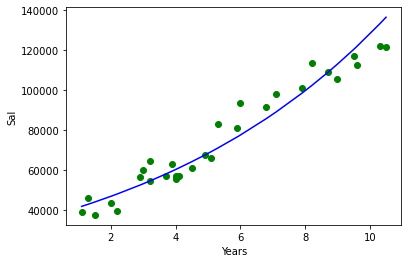

In [45]:
plt.scatter(x=s1['years'],y=s1['sal'],color='green')
plt.plot(s1.years,pred3,color='blue')
plt.xlabel('Years')
plt.ylabel('Sal')

In [46]:
student_resid = model3.resid_pearson 
student_resid 

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

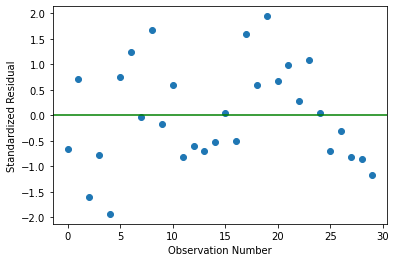

In [47]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

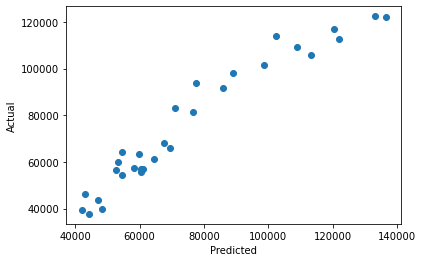

In [48]:
plt.scatter(x=pred3,y=s1.sal)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [50]:
s1["years_Sq"] = s1.years*s1.years
s1  

,years,sal,years_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [51]:
model_quad = smf.ols("np.log(sal)~years+years_Sq",data=s1).fit()
model_quad.params 

Intercept    10.336852
years         0.202382
years_Sq     -0.006614
dtype: float64

In [52]:
model_quad.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           3.95e-18
Time:                        20:19:37   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
years          0.2024      0.027      7.601      0.000       0.148       0.257
years_Sq      -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
pred_quad = model_quad.predict(s1)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4
rmse_quad = np.sqrt(np.mean((np.array(s1['sal'])-np.array(pred4))**2))
rmse_quad  

5391.08158269361

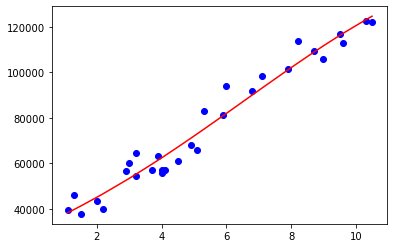

In [54]:
plt.scatter(s1.years,s1.sal,c="b")
plt.plot(s1.years,pred4,"r") 

ValueError: x and y must be the same size

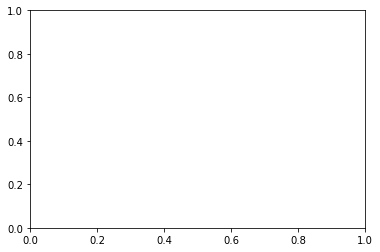

In [56]:
plt.scatter(np.arange(10),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

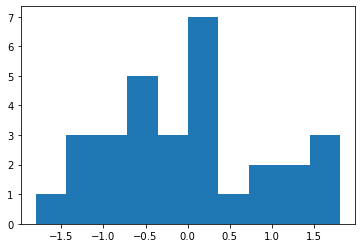

In [57]:
plt.hist(model_quad.resid_pearson)

In [58]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

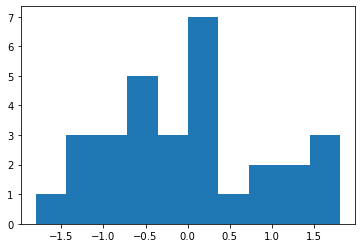

In [59]:
plt.hist(model_quad.resid_pearson) 